<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *DATA SCIENCE / SECTION 4 / SPRINT 2 / NOTE 2*

# 📝 Assignment

---


# Distributed_Representation

## Code

캐글의 [SMS Spam dataset](https://www.kaggle.com/uciml/sms-spam-collection-dataset) 에 사전 학습된 Word2Vec 임베딩 벡터를 적용하여 분류해봅시다.<br/>
세션 노트에 있었던 단어 임베딩 벡터를 평균내어 분류하는 방법을 적용해봅시다.

In [93]:
!pip install gensim --upgrade

In [94]:
import gensim

gensim.__version__

'4.0.1'

In [95]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from keras.preprocessing import sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D
from tensorflow.keras.preprocessing.text import Tokenizer

### 1) 데이터 전처리
    
- 데이터셋을 데이터프레임으로 읽어옵니다 `encoding = 'latin-1'` 을 사용합니다.
- 필요없는 열(column)을 삭제합니다.
- LabelEncoder를 사용하여 label 전처리를 해줍니다. 

In [96]:
np.random.seed(42)
tf.random.set_seed(42)

In [97]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [98]:
### 이곳에서 과제를 수행해 주세요 ###
df = pd.read_csv("/content/drive/MyDrive/spam.csv") # 파일이안열려 메모장에 복사 후 utf-8로 변경

### 2) 텍스트 분류를 수행해주세요.

- 데이터셋 split시 test_size의 비율은 15%로, `random_state = 42` 로 설정합니다. 
- Tokenizer의 `num_words = 1000` 으로 설정합니다.
- pad_sequence의 `maxlen=150` 으로 설정합니다.
- 학습 시, 파라미터는 `batch_size=64, epochs=10, validation_split=0.2` 로 설정합니다.
- evaluate 했을 때의 loss와 accuarcy를 [loss, acc] 형태로 입력해주세요. Ex) [0.4321, 0.8765]

In [99]:
### 이곳에서 과제를 수행해 주세요 ###

X=df["v2"]
Y=df["v1"]
df.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4", "v1", "v2"],axis=1,inplace=True)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


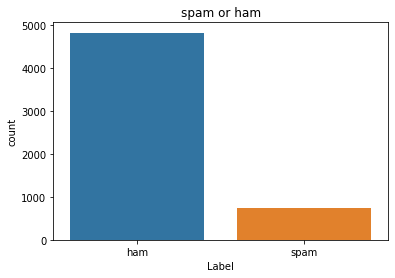

In [100]:
sns.countplot(Y)
plt.xlabel('Label')
plt.title('spam or ham');

In [101]:
le = LabelEncoder()
Y = le.fit_transform(Y)
Y = Y.reshape(-1,1) #2차원으로 변경


In [102]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.15, random_state = 42 )

In [103]:
X_train.head()

4909    WE REGRET TO INFORM U THAT THE NHS HAS MADE A ...
3733                    4 tacos + 1 rajas burrito, right?
2087                                        \alright babe
3378                      Dear umma she called me now :-)
4003    Well there's a pattern emerging of my friends ...
Name: v2, dtype: object

In [104]:
max_words = 1000
max_len = 150 #벡터 최대 길이

tok = Tokenizer(num_words=max_words) # 1000단어까지 허용 
tok.fit_on_texts(X_train) # X_train 데이터에 토큰화 훈련
sequences = tok.texts_to_sequences(X_train) # 토큰화된 단어를 인덱스로 변경
sequences_matrix = sequence.pad_sequences(sequences, maxlen=max_len) # padding  150열

In [105]:
model = Sequential()
model.add(Embedding(max_words, 50,input_length=max_len)) # 은닉층 임베딩 노드 50
model.add(GlobalAveragePooling1D()) # 입력되는 단어 벡터의 평균 구하는 층
model.add(Dense(1, activation='sigmoid')) 
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [106]:
model.fit(sequences_matrix,Y_train,batch_size=64, epochs=10, validation_split=0.2 )

Epoch 1/10
60/60 [==============================] - 1s 7ms/step - loss: 0.6013 - accuracy: 0.8374 - val_loss: 0.5049 - val_accuracy: 0.8660
Epoch 2/10
60/60 [==============================] - 0s 5ms/step - loss: 0.4420 - accuracy: 0.8648 - val_loss: 0.3929 - val_accuracy: 0.8660
Epoch 3/10
60/60 [==============================] - 0s 5ms/step - loss: 0.3780 - accuracy: 0.8648 - val_loss: 0.3677 - val_accuracy: 0.8660
Epoch 4/10
60/60 [==============================] - 0s 5ms/step - loss: 0.3645 - accuracy: 0.8648 - val_loss: 0.3589 - val_accuracy: 0.8660
Epoch 5/10
60/60 [==============================] - 0s 4ms/step - loss: 0.3559 - accuracy: 0.8648 - val_loss: 0.3506 - val_accuracy: 0.8660
Epoch 6/10
60/60 [==============================] - 0s 5ms/step - loss: 0.3470 - accuracy: 0.8648 - val_loss: 0.3414 - val_accuracy: 0.8660
Epoch 7/10
60/60 [==============================] - 0s 5ms/step - loss: 0.3372 - accuracy: 0.8648 - val_loss: 0.3313 - val_accuracy: 0.8660
Epoch 8/10
60/60 [==

In [107]:
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

In [108]:
model.evaluate(test_sequences_matrix,Y_test) #loss : 0.228, accuracy : 0.87

27/27 [==============================] - 0s 5ms/step - loss: 0.2857 - accuracy: 0.8708


[0.2856731414794922, 0.8708133697509766]